In [1]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential


import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

%matplotlib inline

Using TensorFlow backend.


## Lets see the cat!

In [2]:
cat = cv2.imread('cat.png')

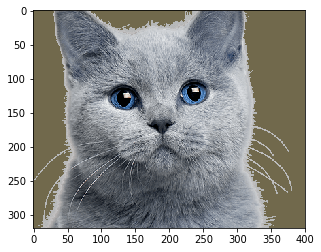

In [3]:
plt.imshow(cat)

In [4]:
# what does the image look like?
cat.shape

(320, 400, 3)

## Lets create a model with 1 Convolutional layer

In [5]:
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))

/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(320, 400,...)`
  """


In [6]:
# Keras expects batches of images, so we have to add a dimension to trick it into being nice
cat_batch = np.expand_dims(cat,axis=0)

In [7]:
conv_cat = model.predict(cat_batch)

In [8]:
# here we get rid of that added dimension and plot the image
def visualize_cat(model, cat):
    # Keras expects batches of images, so we have to add a dimension to trick it into being nice
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat = model.predict(cat_batch)
    conv_cat = np.squeeze(conv_cat, axis=0)
    print(conv_cat.shape)
    plt.imshow(conv_cat)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(318, 398, 3)


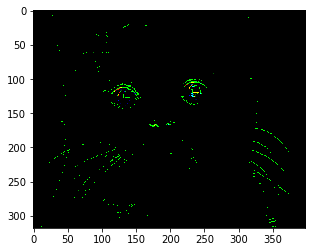

In [9]:
visualize_cat(model, cat)

## 10x10 Kernel ConvCat

/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (10, 10), input_shape=(320, 400,...)`
  """
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(311, 391, 3)


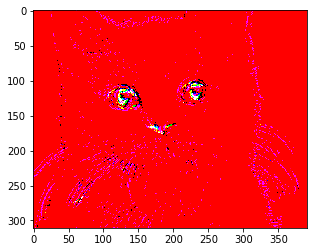

In [10]:
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        10,    # y dimension of kernel (we're going for a 3x3 kernel)
                        10,    # x dimension of kernel
                        input_shape=cat.shape))


visualize_cat(model, cat)

## Cat with 1 filter

In [11]:
# Note: matplot lib is pretty inconsistent with how it plots these weird cat arrays.
# Try running them a couple of times if the output doesn't quite match the blog post results.
def nice_cat_printer(model, cat):
    '''prints the cat as a 2d array'''
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat2 = model.predict(cat_batch)

    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    print(conv_cat2.shape)
    conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])

    print(conv_cat2.shape)
    plt.imshow(conv_cat2)

/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(320, 400,...)`
  """


(318, 398, 1)
(318, 398)


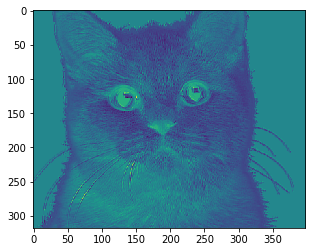

In [12]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))

# Keras expects batches of images, so we have to add a dimension to trick it into being nice
nice_cat_printer(model, cat)

/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (15, 15), input_shape=(320, 400,...)`
  


(306, 386, 1)
(306, 386)


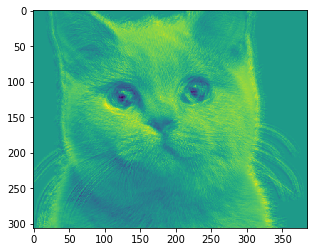

In [13]:
# 15x15 kernel size
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        15,    # y dimension of kernel (we're going for a 3x3 kernel)
                        15,    # x dimension of kernel
                        input_shape=cat.shape))

nice_cat_printer(model, cat)

## Lets add a relu activation

/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(320, 400,...)`
  """


(318, 398, 1)
(318, 398)


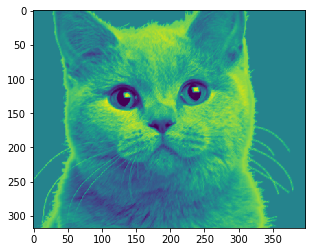

In [14]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))

nice_cat_printer(model, cat)

/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(320, 400,...)`
  """
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(318, 398, 3)


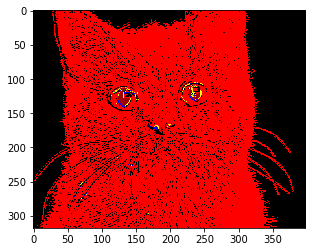

In [15]:
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))

visualize_cat(model, cat)

## Max Pooling

/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(320, 400,...)`
  """


(63, 79, 1)
(63, 79)


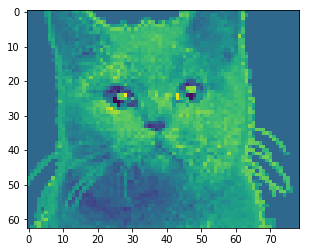

In [16]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets add a new max pooling layer!
model.add(MaxPooling2D(pool_size=(5,5)))

nice_cat_printer(model, cat)

/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(320, 400,...)`
  """
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(63, 79, 3)


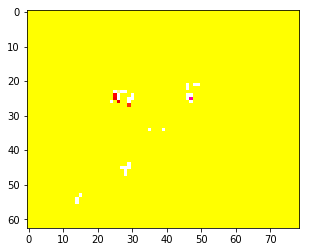

In [17]:
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets add a new max pooling layer!
model.add(MaxPooling2D(pool_size=(5,5)))

# nice_cat_printer(model, cat)
visualize_cat(model, cat)

## Activation then pooling

/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(320, 400,...)`
  """


(63, 79, 1)
(63, 79)


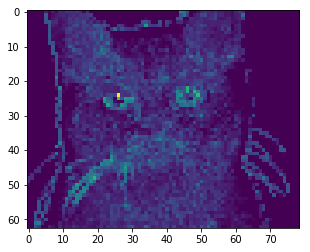

In [18]:
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

nice_cat_printer(model, cat)

/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(3, (3, 3), input_shape=(320, 400,...)`
  """
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(63, 79, 3)


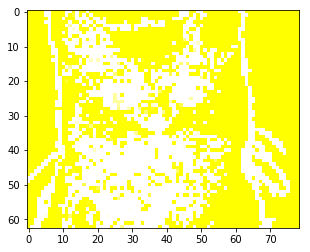

In [19]:
model = Sequential()
model.add(Convolution2D(3,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_cat(model, cat)

## Cat after the convolutional and pooling stages of LeNet

/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(320, 400,...)`
  
/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(320, 400,...)`
  del sys.path[0]


(34, 43, 1)
(34, 43)


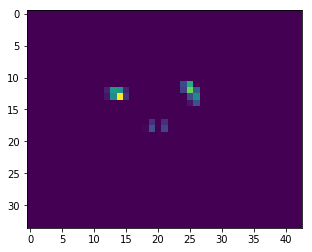

In [20]:
# 1 filter in each conv layer for pretty printing
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))

nice_cat_printer(model, cat)

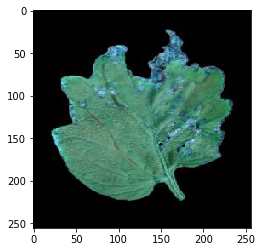

In [25]:
from keras.layers import Conv2D
from keras.preprocessing import image
cat = cv2.imread('/Users/fadlimuharram/Documents/cnn/tomat/segmentTambahan/training_set/Bacterial_spot/2f48b422-e9b2-4143-8b7f-c44cea6fb2fd___UF.GRC_BS_Lab Leaf 0450_final_masked.jpg')
plt.imshow(cat)

/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(256, 256,...)`
  


(254, 254, 1)
(254, 254)


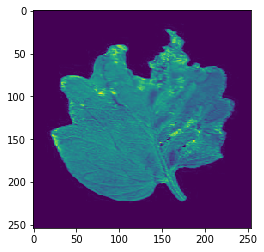

In [69]:
# 1 filter in each conv layer for pretty printing
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(3,3)))
nice_cat_printer(model, cat)

/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(256, 256,...)`
  
/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1, (3, 3), input_shape=(256, 256,...)`
  del sys.path[0]


(82, 82, 1)
(82, 82)


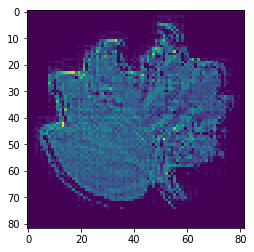

In [78]:
# 1 filter in each conv layer for pretty printing
model = Sequential()
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(1,    # number of filter layers
                        3,    # y dimension of kernel (we're going for a 3x3 kernel)
                        3,    # x dimension of kernel
                        input_shape=cat.shape))
# Lets activate then pool!
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(3,3)))

nice_cat_printer(model, cat)